# Data Loading

In [1]:
# Let's begin by loading the data to check for any issues and perform the data wrangling process.
import pandas as pd

# Load the dataset
file_path = 'AusApparalSales4thQrt2020.csv'
sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(sales_data.head())

# Display the last few rows of the dataframe
print("\n", sales_data.tail())


         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500

              Date        Time State     Group  Unit  Sales
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500


# Data Wrangling

In [3]:
# Check for missing values in the dataset
missing_data = sales_data.isna().sum()
found_data = sales_data.notna().sum()

# Check for any suspicious or unusual data that might indicate incorrect data
# For the 'Date' column, we'll check if all entries are valid dates
# For the 'Time' column, we'll check the unique values to ensure they're expected values
# For 'State', 'Group', and 'Unit', 'Sales' we'll check for unique values as well
date_check = pd.to_datetime(sales_data['Date'], errors='coerce').isna().sum()
time_unique_values = sales_data['Time'].unique()
state_unique_values = sales_data['State'].unique()
group_unique_values = sales_data['Group'].unique()

# Strip leading/trailing spaces from 'Time', 'State', and 'Group' columns
sales_data['Time'] = sales_data['Time'].str.strip()
sales_data['State'] = sales_data['State'].str.strip()
sales_data['Group'] = sales_data['Group'].str.strip()

# Now, we will perform the descriptive statistical analysis on the 'Sales' and 'Unit' columns
descriptive_stats = sales_data[['Unit', 'Sales']].describe()

# Calculate the mode separately as it's not included in the describe() by default
mode_units = sales_data['Unit'].mode()[0]
mode_sales = sales_data['Sales'].mode()[0]

# Add the mode to the descriptive statistics
descriptive_stats.loc['mode'] = [mode_units, mode_sales]

# Display the descriptive statistics
descriptive_stats

print("Using `isna` to check for missing values in the dataset:")
print(missing_data)
print("\nUsing `notna` to check for found values in the dataset:")
print(found_data)
print("\nChecking for invalid dates in the 'Date' column:")
print(date_check)
print("\nUnique values in the 'Time' column:")
print(time_unique_values)
print("\nUnique values in the 'State' column:")
print(state_unique_values)
print("\nUnique values in the 'Group' column:")
print(group_unique_values)
print("\nDescriptive Statistics for Unit and Sales Data:")
print()
print(descriptive_stats)


Using `isna` to check for missing values in the dataset:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Using `notna` to check for found values in the dataset:
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

Checking for invalid dates in the 'Date' column:
0

Unique values in the 'Time' column:
['Morning' 'Afternoon' 'Evening']

Unique values in the 'State' column:
['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS']

Unique values in the 'Group' column:
['Kids' 'Men' 'Women' 'Seniors']

Descriptive Statistics for Unit and Sales Data:

              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000
mode      9.000000   22500.000000


## Data Wrangling Cleanliness Review

The dataset consists of 7560 entries and six columns without any missing values. Here's a quick overview of the data structure:

- **Date**: The date of the transaction (currently in string format).
- **Time**: The time of day for the transaction (Morning, Afternoon, etc.).
- **State**: The Australian state where the transaction occurred.
- **Group**: The customer group (Kids, Men, Women, Seniors).
- **Unit**: The number of units sold.
- **Sales**: The sales amount in (presumably) Australian dollars.


Overall Results:
- The data doesn't have any missing values, 
- All dates in the 'Date' column are valid. 
- The 'Time', 'State', and 'Group' columns contain expected unique values. 
- The 'Unit' and 'Sales' columns have a wide range of values, which is normal for sales data.

Now, let's consider the treatment for any potential incorrect data that doesn't necessarily show up as missing:

- For 'Unit' and 'Sales', any extremely low or high values could be potential outliers. However, unless there's a clear reason to consider them incorrect (such as a negative sales value), they may represent actual sales data.
- Any incorrect categorization in 'State' or 'Group' would require domain knowledge or a reference to identify.
- Since we don't have any missing data, there's no need for dropping or filling null values.  However if there had been missing data then I would using the following guidelines to determine how I would handle the missing data:
  - If the dataset had a small number of missing values, particularly if they are missing at random, I would recommend filling in the missing data using the median (for numerical data) or mode (for categorical data) to fill these gaps.
  - If there was a pattern in the missing data related to specific times or states (not random), I would suggest investigating further to understand why the data is missing before deciding whether to impute or remove the data.
  - If entire rows or significant portions of the data were missing for certain groups or states, it might be preferable to impute using a model-based approach, which could preserve the relationships between variables.

## Data Wrangling Standardization/Normalization

Next, I will proceed with data normalization. This is the preferred approach because it will adjust the range of data to a standard scale, which is useful for analyzing and comparing sales performance across different states and groups.

Let's normalize the 'Unit' and 'Sales' columns using min-max normalization to scale the values between 0 and 1.

After normalization, we'll consider the use of the groupby() function to aggregate data for further analysis. 

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Unit' and 'Sales' columns
sales_data[['Unit', 'Sales']] = scaler.fit_transform(sales_data[['Unit', 'Sales']])

# Display the normalized data
print("Normalized Data Sample:")
print(sales_data.head())



Normalized Data Sample:
         Date       Time State    Group      Unit     Sales
0  1-Oct-2020    Morning    WA     Kids  0.095238  0.095238
1  1-Oct-2020    Morning    WA      Men  0.095238  0.095238
2  1-Oct-2020    Morning    WA    Women  0.031746  0.031746
3  1-Oct-2020    Morning    WA  Seniors  0.206349  0.206349
4  1-Oct-2020  Afternoon    WA     Kids  0.015873  0.015873


## Data Analysis

The normalization and aggregation have been completed successfully. The 'Unit' and 'Sales' columns are now normalized between 0 and 1, making it easier to compare the data on the same scale. 

- **Mean (Average)**: Both sales and units have an average normalized value of approximately 0.254.
- **Standard Deviation**: Indicates moderate variability in both sales and units with a standard deviation of around 0.205.
- **Minimum and Maximum Values**: Both metrics range from 0 (minimum) to 1 (maximum), confirming the effectiveness of the normalization.
- **Mode**: The most frequent value for both sales and units is approximately 0.111, suggesting a common sale and unit transaction size.


The `groupby()` function can be very useful for chunking data into groups, such as sales by state or by group. It will allow us to perform analyses on these chunks separately, which will be crucial in answering the project's key questions.
For the AAL dataset and the objectives outlined in the project statement, for example through the use of the `groupby()` function the following analysis can be performed on the data provided:

1. **Revenue Analysis by State**:
   - To identify the states generating the highest and lowest revenues, use `groupby('State')` to calculate the total sales for each state. This will provide a clear picture of geographical performance.

2. **Product Group Performance**:
   - Apply `groupby('Group')` to determine the revenue generation by different groups—kids, women, men, and seniors. Understanding which groups are driving the most sales can influence product stocking and marketing efforts.

3. **Temporal Analysis**:
   - If the dataset includes timestamps, `groupby()` can help analyze sales trends over different time frames. For instance, use `groupby([pd.Grouper(key='Date', freq='M')])` for monthly sales trends, which is useful for formulating monthly sales programs.

4. **State and Group Analysis**:
   - To formulate sales programs for states with lower revenues, combine state and group categories using `groupby(['State', 'Group'])`. This dual-level grouping allows you to tailor strategies for specific customer segments within each state.

5. **Preparing Data for Visualization**:
   - To build the dashboard for the Head of S&M, use `groupby()` in combination with aggregation functions to prepare the data for visualization. The summarized data can be directly used to create various charts and graphs for the dashboard.

By strategically using the `groupby()` function to segment the data along these lines, you are able to perform a comprehensive analysis that aligns with the CEO's directives for understanding and improving sales performance across Australia.

The `groupby()` function has also been used to sum the sales by 'State' and by 'Group'.

## Data Analysis Findings

### By Group:

The group generating the **highest sales** is **'Men'**
The group generating the **lowest sales** is **'Seniors'**

### By State:

The state generating the **highest sales** is **Victoria (VIC)**.
The state generating the **lowest sales** is **Western Australia (WA)**.

### Time-based Sales Reports:

**Weekly:** The **highest sales** were made in the **52nd week**, while the **lowest** were in the **40th week**.
**Monthly:** The month of **December** had the **highest sales**, and **November** had the **lower sales**.
**Quarterly:** There is only one quarter represented here, **the 4th**.

In [5]:
# Perform descriptive statistical analysis on the data
desc_stats = sales_data[['Unit', 'Sales']].describe()

# Calculate the mode separately as it's not included in the describe() by default
mode_units = sales_data['Unit'].mode()[0]
mode_sales = sales_data['Sales'].mode()[0]

# Add the mode to the descriptive statistics
descriptive_stats.loc['mode'] = [mode_units, mode_sales]

# Determine which group is generating the highest and lowest sales
sales_by_group = sales_data.groupby('Group')['Sales'].sum().sort_values(ascending=False)

# Determine which state is generating the highest and lowest sales
sales_by_state = sales_data.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Now, convert the 'Date' column to datetime type to generate time-based reports
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Extract day of the week (Monday=0, Sunday=6)
sales_data['Weekday'] = sales_data['Date'].dt.dayofweek

# Map the day of the week from numbers to names
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
sales_data['Weekday'] = sales_data['Weekday'].map(days)

# Aggregate sales by day of the week
weekday_sales = sales_data.groupby('Weekday')['Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Determine which day of the week generates the highest and lowest sales
#sales_by_weekday = weekday_sales.sort_values(ascending=False)
sales_by_weekday = weekday_sales

# Extracting day, week, month, and year for aggregation
sales_data['Day'] = sales_data['Date'].dt.day
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Quarter'] = sales_data['Date'].dt.quarter


# Determine weekly, monthly, and quarterly sales
daily_sales = sales_data.groupby('Day')['Sales'].sum()
weekly_sales = sales_data.groupby('Week')['Sales'].sum()
monthly_sales = sales_data.groupby('Month')['Sales'].sum()
quarterly_sales = sales_data.groupby('Quarter')['Sales'].sum()

# desc_stats, sales_by_group, sales_by_state, weekly_sales, monthly_sales, quarterly_sales

print("Descriptive Statistics for Unit and Sales Data:")
print(desc_stats)
print("\nSales by Group:")
print(sales_by_group)
print("\nSales by State:")
print(sales_by_state)
print("\nWeekday Sales:")
print(sales_by_weekday)
print("\nWeekly Sales:")
print(weekly_sales)
print("\nMonthly Sales:")
print(monthly_sales)
print("\nQuarterly Sales:")
print(quarterly_sales)


Descriptive Statistics for Unit and Sales Data:
              Unit        Sales
count  7560.000000  7560.000000
mean      0.254054     0.254054
std       0.204784     0.204784
min       0.000000     0.000000
25%       0.095238     0.095238
50%       0.190476     0.190476
75%       0.380952     0.380952
max       1.000000     1.000000

Sales by Group:
Group
Men        484.444444
Women      482.492063
Kids       480.142857
Seniors    473.571429
Name: Sales, dtype: float64

Sales by State:
State
VIC    635.968254
NSW    441.714286
SA     339.412698
QLD    177.888889
TAS    110.222222
NT     109.079365
WA     106.365079
Name: Sales, dtype: float64

Weekday Sales:
Weekday
Monday       270.412698
Tuesday      284.873016
Wednesday    282.444444
Thursday     279.015873
Friday       270.095238
Saturday     261.619048
Sunday       272.190476
Name: Sales, dtype: float64

Weekly Sales:
Week
40     84.857143
41    152.777778
42    150.476190
43    151.587302
44    122.460317
45    113.809524
46    

# Data Visualization

Now, let’s proceed with the visualization of this data.

Given that Seaborn is recommended for statistical analysis, I will use it for the visualization. It integrates well with Pandas, provides attractive and informative statistical graphs, and is generally easy to use for creating complex visualizations.

Bar Plots and Box Plots:

For the bar plots and box plots required Seaborn is a more efficient choice. It simplifies creating complex visualizations like displaying the distribution of sales by day with automatic handling of categories and statistical summaries.  Using `sns.barplot` and `sns.boxplot` allowed us to easily map categorical data from pandas and display it with automatically configured axes and a polished style.
Custom Plot Requirements:

I mainly used Matplotlib to create a multi-panel plot onto which i plotted Seaborn plots.Matplotlib is beneficial for this use due to its flexibility in handling subplot arrangements and fine-tuning. Creating a multi-panel figure with various types of plots (bar, line, box) arranged in a specific layout is more straightforward with Matplotlib’s subplot functionality.


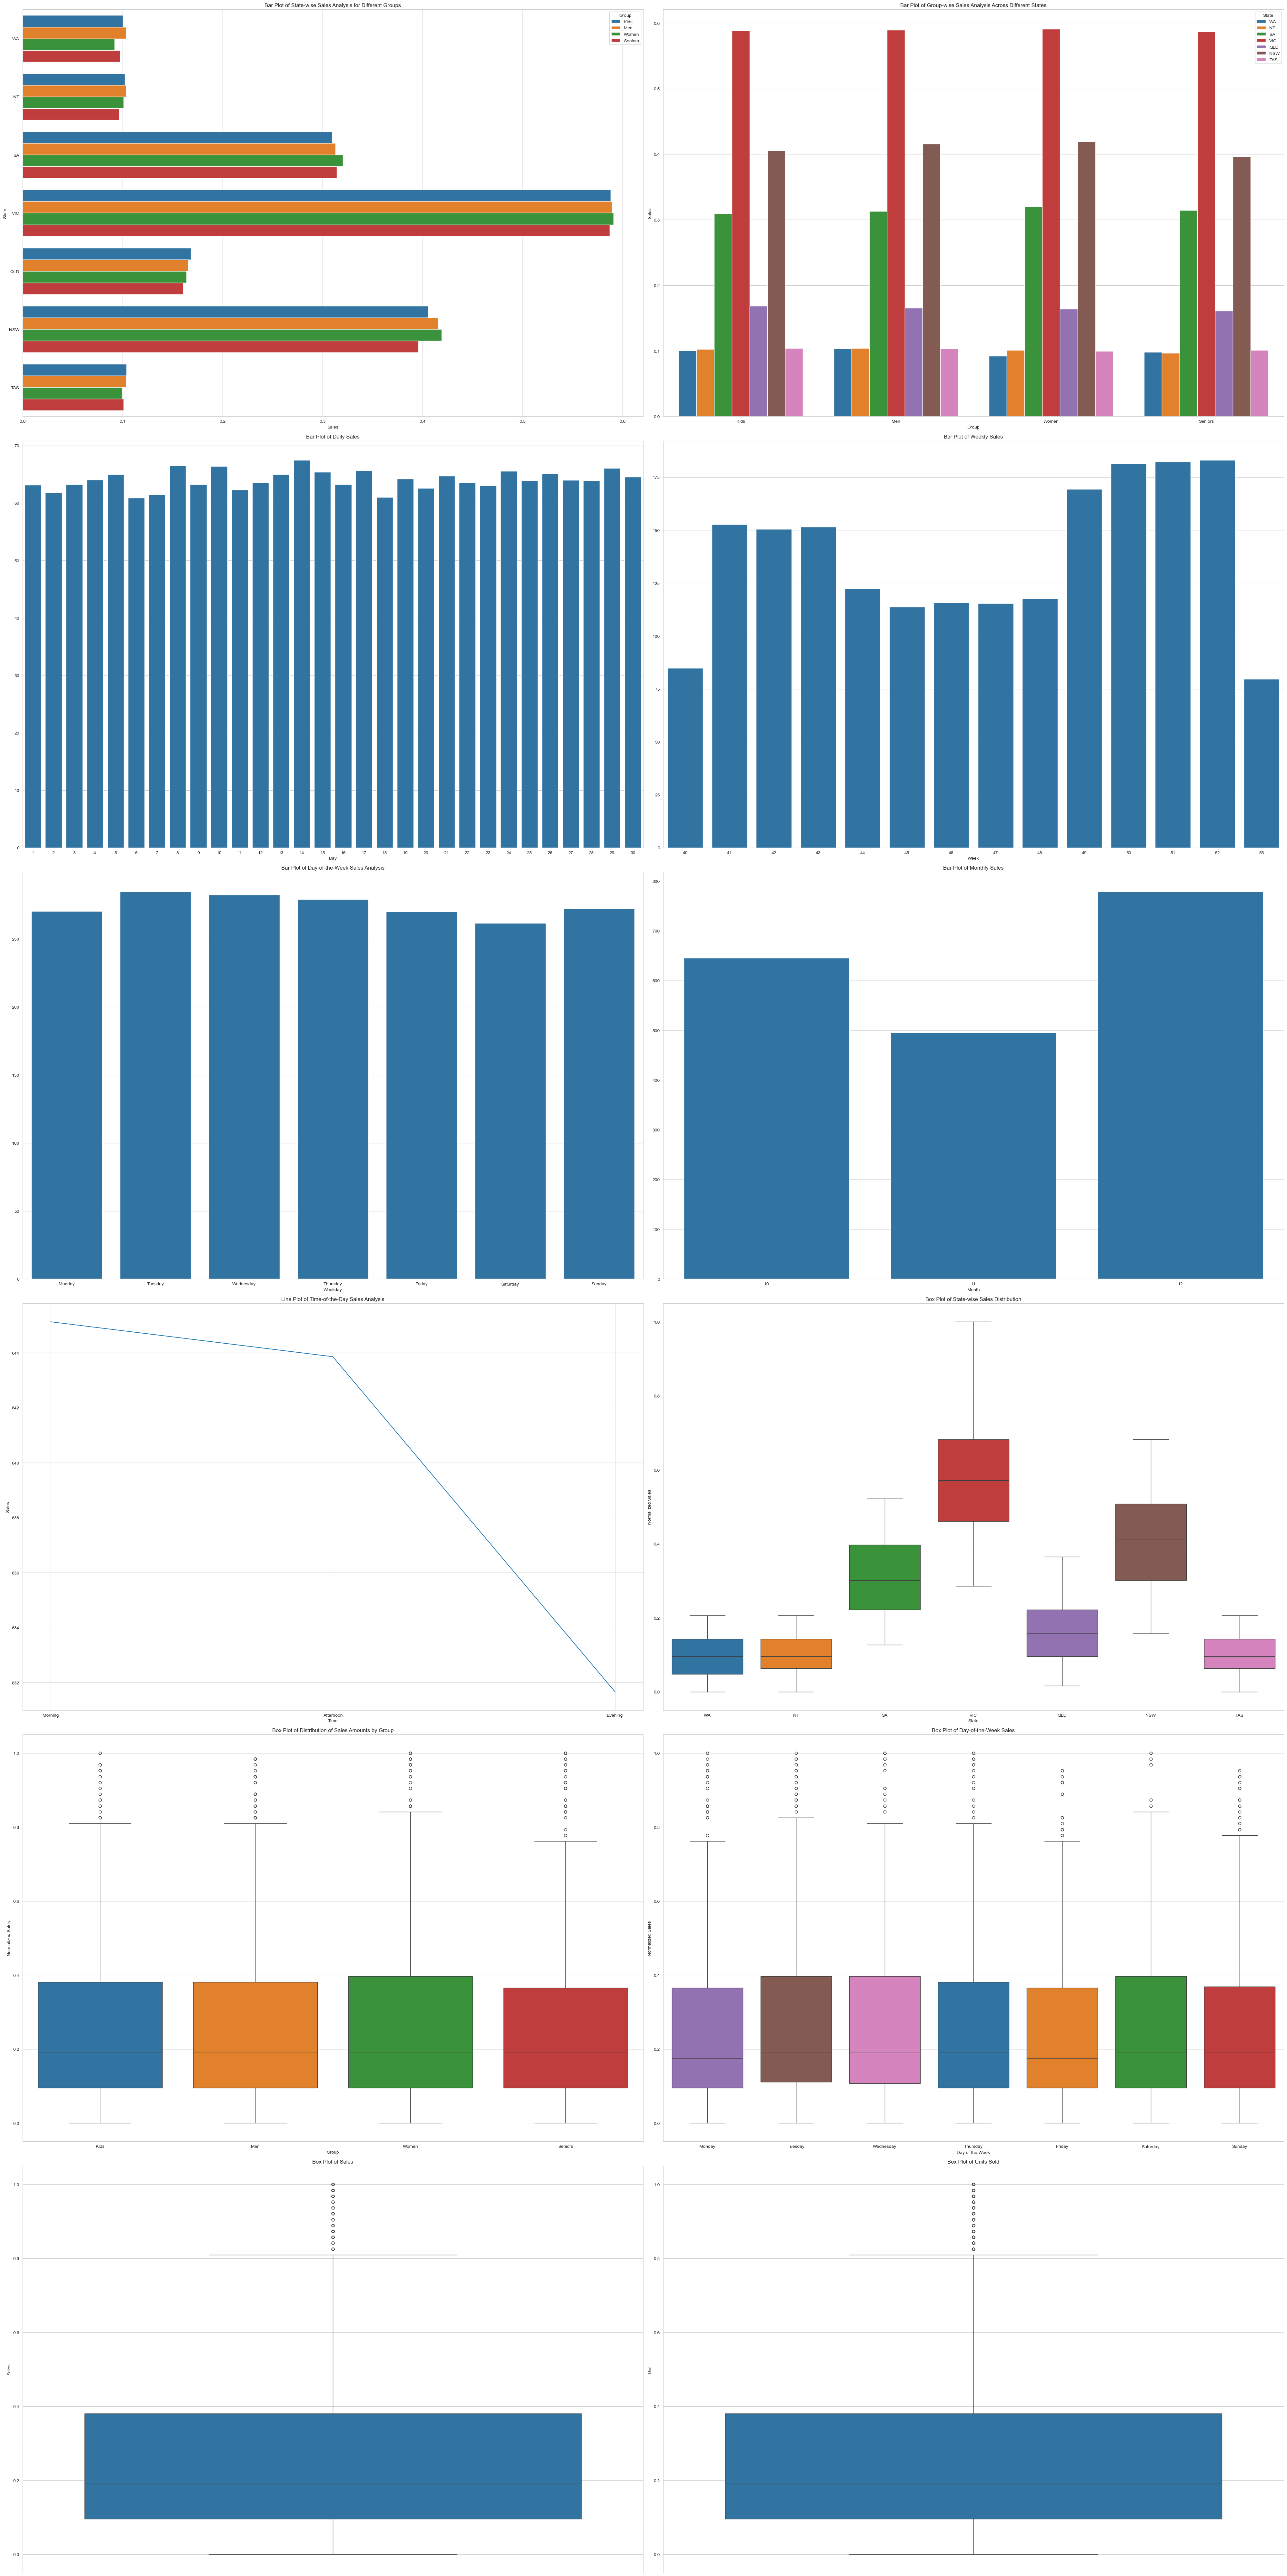

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with subplots
fig, ax = plt.subplots(6, 2, figsize=(40, 80))

# State-wise sales analysis for different groups
sns.barplot(x='Sales', y='State', hue='Group', data=sales_data, ax=ax[0, 0], errorbar=None)
ax[0, 0].set_title('Bar Plot of State-wise Sales Analysis for Different Groups')

# Group-wise sales analysis across different states
sns.barplot(x='Group', y='Sales', hue='State', data=sales_data, ax=ax[0, 1], errorbar=None)
ax[0, 1].set_title('Bar Plot of Group-wise Sales Analysis Across Different States')

# Daily Sales
sns.barplot(x=daily_sales.index, y=daily_sales.values, ax=ax[1, 0], errorbar=None)
ax[1,0].set_title('Bar Plot of Daily Sales')

# Use this palette for the bars
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, ax=ax[1, 1], errorbar=None)
ax[1,1].set_title('Bar Plot of Weekly Sales')

# Day-of-the-week analysis for sales
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, ax=ax[2,0], errorbar=None)
ax[2,0].set_title('Bar Plot of Day-of-the-Week Sales Analysis')

# Monthly Sales
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=ax[2, 1], errorbar=None)
ax[2,1].set_title('Bar Plot of Monthly Sales')

# Time-of-the-day analysis for sales
sns.lineplot(x='Time', y='Sales', data=sales_data, estimator=sum, ax=ax[3,0], errorbar=None, sort=False)
ax[3,0].set_title('Line Plot of Time-of-the-Day Sales Analysis')

# State-wise Sales Distribution
state_sales_boxplot = sales_data
state_sales_boxplot['Hue'] = sales_data['State']

sns.boxplot(data=sales_data, x='State', y='Sales', hue='Hue', ax=ax[3,1])
ax[3,1].set_title('Box Plot of State-wise Sales Distribution')
ax[3,1].set_ylabel('Normalized Sales')
ax[3,1].set_xlabel('State')

# Distribution of Sales Amounts
group_sales_boxplot = sales_data
group_sales_boxplot['Hue'] = sales_data['Group']

sns.boxplot(data=sales_data, x='Group', y='Sales', hue='Hue', ax=ax[4,0])
ax[4,0].set_title('Box Plot of Distribution of Sales Amounts by Group')
ax[4,0].set_ylabel('Normalized Sales')
ax[4,0].set_xlabel('Group')

# # Time-of-Day Sales Distribution
# sns.boxplot(data=sales_data, x='Time', y='Sales', ax=ax[4,1])
# ax[4,1].set_title('Time-of-Day Sales Distribution')

# Create a box plot for the distribution of sales across different days of the week
weekday_sales_boxplot = sales_data
weekday_sales_boxplot['Hue'] = sales_data['Weekday']

sns.boxplot(x='Weekday', y='Sales', data=sales_data, hue='Hue', ax=ax[4,1], order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax[4,1].set_title('Box Plot of Day-of-the-Week Sales')
ax[4,1].set_ylabel('Normalized Sales')
ax[4,1].set_xlabel('Day of the Week')

# Descriptive statistics using box plots for the 'Sales' column
sns.boxplot(y='Sales', data=sales_data, ax=ax[5, 0])
ax[5,0].set_title('Box Plot of Sales')

# Descriptive statistics using box plots for the 'Units Sold' column
sns.boxplot(y='Unit', data=sales_data, ax=ax[5, 1])
ax[5,1].set_title('Box Plot of Units Sold')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Save the figure to a file
viz_file_path = 'sales_analysis_viz.png'
plt.savefig(viz_file_path)

# Show the figure
plt.show()


## Data Visualization Inferences

### State-wise Sales Analysis for Different Groups

This bar chart shows the sales for different groups (Kids, Men, Women, and Seniors) across the states. It is evident that Victoria has the highest sales across all groups, and Western Australia has the lowest.

### Group-wise Sales Analysis Across Different States

This bar chart compares the total sales made by each group across the states. Men's group appears to lead in sales in most states.

### Daily Sales

1. The bar chart shows fluctuations in daily sales, with some days experiencing significantly higher sales. This could correlate with weekends, holidays, or special promotional events.
2. Monitoring these spikes can help in planning stock and staffing requirements.

### Weekly Sales:

1. Sales trends on a weekly basis reveal periods of higher sales, particularly towards the end of the sampling period, which likely corresponds to holiday shopping in December.
2. The company might consider focusing marketing efforts during these peak weeks to maximize revenue.

### Days of the Week Sales:

1. Sales trends vary by day of the week, with some days clearly performing better than others. This could be used to tailor daily promotions or marketing campaigns to boost sales on slower days.
2. Understanding these patterns can also aid in inventory management and staffing.

### Monthly Sales:

The bar chart aggregates the weekly sales data and shows similar trends.  December has the highest sales and November the lowest and October sitting between.

### Time-of-the-Day Sales Analysis

The line plot indicates that sales are highest in the morning and decrease as the day progresses, with the evening having the lowest sales. This information can help the Sales & Marketing team to target their efforts during different times of the day.

### State-wise Sales Distribution Box Plot

There's notable variability in sales among different states. States like VIC show higher median sales and a wider distribution, indicating both high sales days and significant fluctuation. States with tighter distributions, like WA, suggest more consistent but lower sales.

### Distribution of Sales Amounts by Group Box Plot

1. The sales across different groups (Kids, Men, Women, Seniors) are relatively similar, with men showing slightly higher median sales. This uniformity suggests that all groups are significant contributors to the revenue, though men's products might have slightly better performance.
2. The presence of outliers in all groups suggests occasional spikes in sales, potentially driven by seasonal trends or promotions.

### Days of The Week Sales Box Plot:

1. *Variability and Spread:*

    - Days like Tuesday and Wednesday show a narrower interquartile range (IQR), indicating more consistent sales figures across these days.
    - Monday and Sunday display wider IQRs, suggesting greater variability in sales. This might indicate that these days are subject to fluctuations possibly driven by external factors such as weather, holidays, or special events.

2. *Outliers:*

   - Several days show outliers, particularly Sunday. This could suggest occasional very high sales, possibly due to specific promotions or events that occur sporadically.

3. *Median Sales:*

   - The median sales across the days are relatively consistent, with no day showing a dramatically different median compared to others. This suggests an overall steady demand across the week.

### Sales and Units Sold Box Plots

1. Both plots show a similar distribution pattern, with a few outliers indicating unusually high sales or unit transactions on certain days.
2. The median (middle line in the box) is closer to the lower quartile, suggesting a skew towards lower sales and units for the majority of transactions.

## Strategic Recommendations:

- **Resource Allocation:** Adjust staffing and inventory based on expected sales volumes as indicated by day-of-the-week and weekly trends.
- **Consistency in Midweek:** The consistency in sales from Tuesday to Thursday could be leveraged for steady revenue generation, planning inventory, and staffing efficiently.
- **Potential for Improvement:** The variability in sales on Monday and Sunday suggests these days might benefit from targeted marketing campaigns or special promotions to stabilize and potentially increase sales.
- **Strategic Promotions:** The presence of outliers, especially on days like Sunday, indicates that certain strategies may be very effective in driving up sales. Identifying what works on these days could be replicated or adapted for use on other days.